In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pickle

In [296]:
df=pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [258]:
df.shape

(301, 9)

In [259]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [260]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [261]:
df.isnull().mean()

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64

In [262]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [263]:
final_set=df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [264]:
final_set['Current_Year']=2020

In [265]:
final_set['No_of_total_years']=final_set['Current_Year']-final_set['Year']

In [266]:
final_set.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_total_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [267]:
final_set.drop(['Year','Current_Year'],axis=1,inplace=True)

In [268]:
final_set.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_total_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [269]:
def labelencoding(df,variable):
    label=LabelEncoder()
    df[variable]=label.fit_transform(df[variable])

In [270]:
labelencoding(final_set,'Fuel_Type')
labelencoding(final_set,'Seller_Type')
labelencoding(final_set,'Transmission')

In [295]:
final_set.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_total_years
0,3.35,5.59,27000,2,0,1,0,6
1,4.75,9.54,43000,1,0,1,0,7
2,7.25,9.85,6900,2,0,1,0,3
3,2.85,4.15,5200,2,0,1,0,9
4,4.60,6.87,42450,1,0,1,0,6


In [245]:
"""final_set=pd.get_dummies(final_set,drop_first=True)
final_set.head()"""

'final_set=pd.get_dummies(final_set,drop_first=True)\nfinal_set.head()'

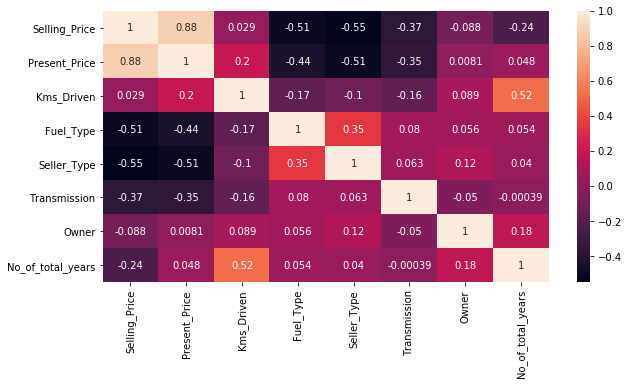

In [246]:
plt.figure(figsize=(10,5))
sns.heatmap(final_set.corr(),annot=True)

In [ ]:
sns.pairplot(final_set)

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(df['Year'],df['Selling_Price'])

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(final_set['Selling_Price'])

In [272]:
X=final_set.iloc[:,1:]
y=final_set.iloc[:,0]

In [273]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_total_years
0,5.59,27000,2,0,1,0,6
1,9.54,43000,1,0,1,0,7
2,9.85,6900,2,0,1,0,3
3,4.15,5200,2,0,1,0,9
4,6.87,42450,1,0,1,0,6


In [274]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.2,random_state=0)
print("Training Data Set : " ,X_train.shape,y_train.shape)
print("Testing Data Set : " ,X_test.shape,y_test.shape)

Training Data Set :  (240, 7) (240,)
Testing Data Set :  (61, 7) (61,)


In [275]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_lin_pred=linreg.predict(X_test)

In [276]:
print(r2_score(y_test,y_lin_pred))
print(mean_squared_error(y_test,y_lin_pred))

0.9134181721224689
2.1885564456572286


In [277]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_ridge_pred=ridge.predict(X_test)

In [ ]:
print(r2_score(y_test,y_ridge_pred))
print(mean_squared_error(y_test,y_ridge_pred))

In [278]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]

max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=6)]

min_samples_split=[2,5,10,15,20,100]

min_samples_leaf=[1,2,5,10,15]

max_features=["auto","sqrt"]

In [279]:
rf_para = {
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "min_samples_split":min_samples_split,
    "min_samples_leaf":min_samples_leaf,
    "max_features":max_features    
}

In [280]:
rf_reg=RandomForestRegressor()

In [281]:
rf_rand=RandomizedSearchCV(estimator=rf_reg,param_distributions=rf_para,cv=6,
                       n_iter=10,scoring='neg_mean_squared_error',random_state=5,n_jobs=1)

rf_rand.fit(X_train,y_train)

RandomizedSearchCV(cv=6, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [282]:
y_pred=rf_rand.predict(X_test)
y_pred

array([ 6.89946522,  0.48475149,  4.76661226,  8.83880387, 14.57973187,
        5.2407606 ,  3.21545119,  0.43917353,  3.91375925,  4.91590908,
        2.84734496,  0.73669431,  4.87135339,  7.21264171,  7.65908184,
       14.5872631 ,  6.7529515 ,  3.99888832,  0.45836915,  1.57178424,
        3.14565778,  5.04861374,  5.32221892,  9.82358089,  0.19354872,
        0.74501715,  0.30008394,  0.69653784,  0.49115498,  4.10353987,
        2.49317671,  5.94254696,  0.49230369,  7.31427801,  3.33111653,
        1.15921789,  5.75312284,  5.40131813,  0.23867913,  7.94957576,
        8.10425925, 22.65853138,  4.94623872,  4.48530341,  5.79554676,
       10.95274571,  0.24702178,  0.78900711,  5.40475014,  6.59046126,
        6.70958228,  3.08806029,  5.37477557, 23.67152388,  1.16971479,
        1.15223287,  0.46625684,  2.52579027,  3.52277653,  2.53589284,
        3.80302791])

In [283]:
y_test

223     8.25
150     0.50
226     5.25
296     9.50
52     18.00
       ...  
137     0.65
227     2.55
26      4.15
106     1.35
92      3.51
Name: Selling_Price, Length: 61, dtype: float64

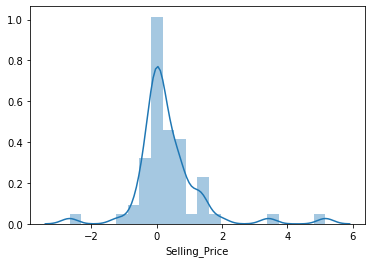

In [284]:
sns.distplot(y_test-y_pred)

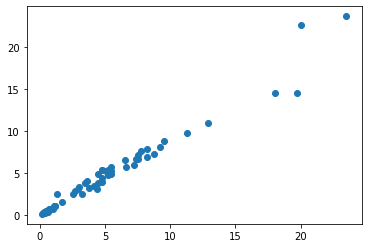

In [285]:
plt.scatter(y_test,y_pred)

In [286]:
output = pd.DataFrame({ 'ytest' : y_test, 'predict': y_pred},)

In [287]:
output.head(10)

,ytest,predict
223,8.25,6.899465
150,0.50,0.484751
226,5.25,4.766612
296,9.50,8.838804
52,18.00,14.579732
261,5.50,5.240761
246,3.75,3.215451
166,0.45,0.439174
221,4.50,3.913759
215,4.50,4.915909


In [288]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.9557396530172247
1.1187828907146016


In [289]:
filename = 'car_price_modal.pkl'
pickle.dump(rf_rand, open(filename, 'wb'))